# Predicting of Customer Churn By Machine Learning

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

Additionally, measure the AUC-ROC metric and compare it with the F1.

In this project, we are going to use the Logistic Regression and Random Forest Classifier models.

In [1]:
# import pandas
import pandas as pd
# import numpy
import numpy as np
# import matplot
import matplotlib.pyplot as plt
import seaborn as sns
# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils import shuffle


## Open the data file and study the general information

In [2]:
# open dataset
try: 
    df = pd.read_csv('/datasets/Churn.csv')
except:
    print('Somethong went wrong.')
else:
    print("Read the data successfully. ")

Read the data successfully. 


In [3]:
# check the first 5 rows of dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# check the last 5 rows of dataframe
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [5]:
# the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# check the statistics of dataframe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# check the number of columns and rows of dataframe
df.shape

(10000, 14)

There are 10000 rows and 14 columns. 

In [8]:
# check for the missing values
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

There are 909 missing numbers in `Tenure` column. 

In [9]:
# check out the percentage of missing value in Tenure
df['Tenure'].isna().sum()/len(df)*100

9.09

We have 9.09% of values are missing. 

In [10]:
# check for duplicates
df.duplicated().sum()

0

We don't have any duplicated values. 

### Conclusion
* There are 10000 rows and 14 columns.
* We don't have any duplicated values.
* We found there were missing values in `Tenure` column, we are going to fix them in the next step.

## Preparing Data

### Processing Missing values

In [11]:
df['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

We notice the minimum value for `Tenure` is 0 and maximum value is 10, we can create a list with values between 0 and 10. And fill missing values with random numbers selecting between 0 and 10. 

In [12]:
fill_list = list(range(0, 11))
df['Tenure'] = df['Tenure'].fillna(pd.Series(np.random.choice(fill_list, size = len(df.index))))

In [13]:
# now we don't have missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### One-Hot encoding for the categorical features

first drop unimportant columns 

In [14]:
df = df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [15]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Conclusion
We replaced missing values of `Tenure` column with random numbers selecting from existing values (0 to 10), we using One-Hot encoding for the categorical features.  

## Machine Learning Models

### Splitting the data

In [16]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']


X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 12345)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size = 0.5, random_state = 12345)

print('Training features:', X_train.shape)
print('Validation features:', X_valid.shape)
print('Testing features:', y_test.shape)

Training features: (6000, 11)
Validation features: (2000, 11)
Testing features: (2000,)


### Checking balance of class

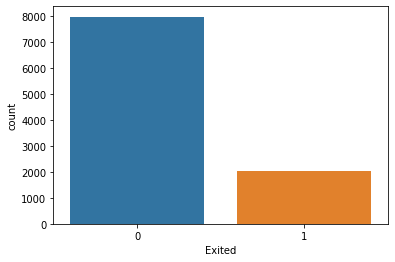

In [17]:
sns.countplot(df['Exited'])
plt.show()

We can conclude that the class is imbalanced, we are going to train the model without taking the imbalance into consideration.

### Logistic Regression 

In [18]:
LR_model = LogisticRegression(random_state = 12345, solver = 'liblinear')
LR_model.fit(X_train, y_train)


predictions_valid = LR_model.predict(X_valid)
valid_score = accuracy_score(y_valid, predictions_valid)

print('Accuracy score is', valid_score.round(3))
print('F1 score is', f1_score(y_valid, predictions_valid).round(3))

Accuracy score is 0.788
F1 score is 0.134


The accuracy score for the validation set is 0.791, and the F1 score for the validation set is 0.043. 

### Random Forest Classifier

In [19]:
estimator_list = [i for i in range(10, 101, 5)]
RFC_accuracy = [] # Log validation accuracy scores for the model
F1_Score = [] 

for estimator in estimator_list:
        model = RandomForestClassifier(random_state=12345,  n_estimators = estimator)
        model.fit(X_train, y_train)
        predictions_valid = model.predict(X_valid)
        
        valid_score = accuracy_score(y_valid, predictions_valid)
        RFC_accuracy.append(valid_score)
        f1score = f1_score(y_valid, predictions_valid)  
        F1_Score.append(f1score)

        print("n_estimator =", estimator, " ", end = '')
        print('F1 Score:', f1score.round(3), " ", end = '')
        print('Validation Accuracy', valid_score.round(3))

n_estimator = 10  F1 Score: 0.521  Validation Accuracy 0.839
n_estimator = 15  F1 Score: 0.545  Validation Accuracy 0.842
n_estimator = 20  F1 Score: 0.527  Validation Accuracy 0.84
n_estimator = 25  F1 Score: 0.539  Validation Accuracy 0.842
n_estimator = 30  F1 Score: 0.535  Validation Accuracy 0.845
n_estimator = 35  F1 Score: 0.544  Validation Accuracy 0.846
n_estimator = 40  F1 Score: 0.542  Validation Accuracy 0.846
n_estimator = 45  F1 Score: 0.55  Validation Accuracy 0.848
n_estimator = 50  F1 Score: 0.54  Validation Accuracy 0.846
n_estimator = 55  F1 Score: 0.551  Validation Accuracy 0.848
n_estimator = 60  F1 Score: 0.545  Validation Accuracy 0.848
n_estimator = 65  F1 Score: 0.553  Validation Accuracy 0.849
n_estimator = 70  F1 Score: 0.559  Validation Accuracy 0.851
n_estimator = 75  F1 Score: 0.556  Validation Accuracy 0.85
n_estimator = 80  F1 Score: 0.55  Validation Accuracy 0.85
n_estimator = 85  F1 Score: 0.552  Validation Accuracy 0.848
n_estimator = 90  F1 Score: 0.

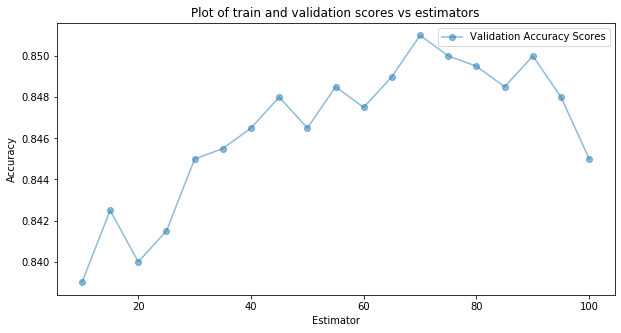

In [20]:
plt.figure(figsize=(10,5))
plt.plot(estimator_list, RFC_accuracy, '-o', label = 'Validation Accuracy Scores', alpha = 0.5)
plt.title('Plot of train and validation scores vs estimators')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

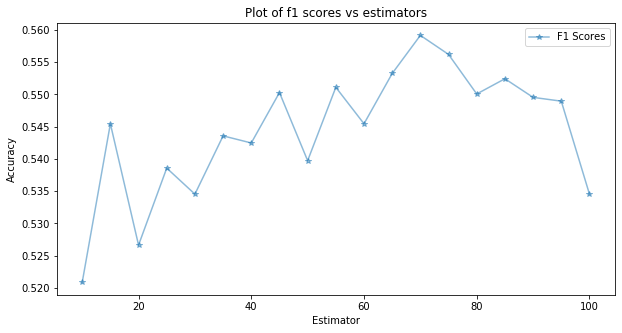

In [21]:
plt.figure(figsize=(10,5))
plt.plot(estimator_list, F1_Score, '-*', label = 'F1 Scores', alpha = 0.5)
plt.title('Plot of f1 scores vs estimators')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The best random forest model is when estimators = 70, the accuracy score = 0.857 and F1 score = 0.567

### Conclusion
* We split the data with 60% training data and 20% validation data. 
* The logistic regression model has accuracy score for the validation set is 0.791, and the F1 score for the validation set is 0.043.
* the best random forest model is when estimators = 70, the accuracy score = 0.857 and F1 score = 0.567

## Improve Models Quality

### Class weight adjustment

#### Logistic regression

In [22]:
LR_model = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight='balanced')
LR_model.fit(X_train, y_train)


predictions_valid = LR_model.predict(X_valid)
valid_score = accuracy_score(y_valid, predictions_valid)

print('Accuracy score is', valid_score.round(3))
print('F1 score is', f1_score(y_valid, predictions_valid).round(3))

Accuracy score is 0.676
F1 score is 0.467


The F1 score already improved. 

#### Random forest classifier

In [23]:
estimator_list = [i for i in range(50, 101, 10)]
depth_list = [i for i in range(10, 20)]
RFC_accuracy = [] # Log validation accuracy scores for the model
F1_Score = [] 

for estimator in estimator_list:
    for depth in depth_list:
        model = RandomForestClassifier(random_state=12345,  n_estimators = estimator, max_depth = depth, class_weight='balanced')
        model.fit(X_train, y_train)
        predictions_valid = model.predict(X_valid)
        
        valid_score = accuracy_score(y_valid, predictions_valid)
        RFC_accuracy.append(valid_score)
        f1score = f1_score(y_valid, predictions_valid)  
        F1_Score.append(f1score)

        print("n_estimator =", estimator, " ", end = '')
        print("Depth =", depth, " ", end = '')
        print('F1 Score:', f1score.round(3), " ", end = '')
        print('Validation Accuracy', valid_score.round(3))

n_estimator = 50  Depth = 10  F1 Score: 0.591  Validation Accuracy 0.826
n_estimator = 50  Depth = 11  F1 Score: 0.595  Validation Accuracy 0.839
n_estimator = 50  Depth = 12  F1 Score: 0.584  Validation Accuracy 0.844
n_estimator = 50  Depth = 13  F1 Score: 0.553  Validation Accuracy 0.839
n_estimator = 50  Depth = 14  F1 Score: 0.565  Validation Accuracy 0.85
n_estimator = 50  Depth = 15  F1 Score: 0.542  Validation Accuracy 0.843
n_estimator = 50  Depth = 16  F1 Score: 0.535  Validation Accuracy 0.845
n_estimator = 50  Depth = 17  F1 Score: 0.511  Validation Accuracy 0.84
n_estimator = 50  Depth = 18  F1 Score: 0.511  Validation Accuracy 0.842
n_estimator = 50  Depth = 19  F1 Score: 0.516  Validation Accuracy 0.842
n_estimator = 60  Depth = 10  F1 Score: 0.597  Validation Accuracy 0.83
n_estimator = 60  Depth = 11  F1 Score: 0.605  Validation Accuracy 0.843
n_estimator = 60  Depth = 12  F1 Score: 0.598  Validation Accuracy 0.85
n_estimator = 60  Depth = 13  F1 Score: 0.561  Validati

The random forest model with balanced class weight, and n_estimator = 60, Depth = 11, F1 Score: 0.611  Validation Accuracy 0.845. Already improved! 


### Upsampling

Duplicate the positive observations several times.

In [24]:
# function to perform upsampling 
def upsample(features, target, repeat):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]
    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

#### Logistic regression

In [25]:
repeat_list = []
for repeat in range(1, 16):
    X_upsampled, y_upsampled = upsample(X_train, y_train, repeat)
    model = LogisticRegression(random_state = 12345, solver='liblinear')
    model.fit(X_upsampled, y_upsampled)
    predictions_valid = model.predict(X_valid)
    print("Repeats:", repeat, end = ' ')
    print('F1:', f1_score(y_valid, predictions_valid).round(3))

Repeats: 1 F1: 0.152
Repeats: 2 F1: 0.33
Repeats: 3 F1: 0.419
Repeats: 4 F1: 0.433
Repeats: 5 F1: 0.418
Repeats: 6 F1: 0.409
Repeats: 7 F1: 0.396
Repeats: 8 F1: 0.371
Repeats: 9 F1: 0.38
Repeats: 10 F1: 0.357
Repeats: 11 F1: 0.366
Repeats: 12 F1: 0.354
Repeats: 13 F1: 0.359
Repeats: 14 F1: 0.357
Repeats: 15 F1: 0.354


The best upsampling of logistic regression is when repeats = 4, F1 score = 0.454. Unfortunately, It doesn't improve the F1 score. 

#### Random forest classifier

In [26]:
for repeat in range(1, 16):   
    X_upsampled, y_upsampled = upsample(X_train, y_train, repeat)
    model = RandomForestClassifier(random_state=12345,  n_estimators = 60, max_depth = 11, class_weight='balanced')
    model.fit(X_upsampled, y_upsampled)
    predictions_valid = model.predict(X_valid)

    print("Repeats:", repeat, end = ' ')
    print('F1:', f1_score(y_valid, predictions_valid).round(3))

Repeats: 1 F1: 0.823
Repeats: 2 F1: 0.82
Repeats: 3 F1: 0.81
Repeats: 4 F1: 0.83
Repeats: 5 F1: 0.816
Repeats: 6 F1: 0.818
Repeats: 7 F1: 0.811
Repeats: 8 F1: 0.817
Repeats: 9 F1: 0.814
Repeats: 10 F1: 0.823
Repeats: 11 F1: 0.82
Repeats: 12 F1: 0.813
Repeats: 13 F1: 0.818
Repeats: 14 F1: 0.815
Repeats: 15 F1: 0.818


The best upsampling of random forest classifier is when repeats = 2, F1 score = 0.826. It improves the F1 score.

#### Conclusion

By using upsampling to duplicate the positive observations several times, our F1 score doesn't improve much, let's try downsampling to randomly drop a portion of the negative observations. 

### Downsampling

In [27]:
def downsampling(X, y, fraction):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_downsampled = pd.concat([X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones])
    y_downsampled = pd.concat([y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

#### Logistic regression

In [28]:
for fraction in np.arange(0.01, 0.4, 0.02):
    X_downsampled, y_downsampled = downsampling(X_train, y_train, fraction)
    model = LogisticRegression(random_state = 12345, solver='liblinear')
    model.fit(X_downsampled, y_downsampled)
    predictions_valid = model.predict(X_valid)
    print("Fraction:", fraction, end = ' ')
    print('F1:', f1_score(y_valid, predictions_valid).round(3))

Fraction: 0.01 F1: 0.349
Fraction: 0.03 F1: 0.35
Fraction: 0.049999999999999996 F1: 0.354
Fraction: 0.06999999999999999 F1: 0.352
Fraction: 0.08999999999999998 F1: 0.37
Fraction: 0.10999999999999997 F1: 0.387
Fraction: 0.12999999999999998 F1: 0.395
Fraction: 0.15 F1: 0.407
Fraction: 0.16999999999999998 F1: 0.406
Fraction: 0.18999999999999997 F1: 0.412
Fraction: 0.20999999999999996 F1: 0.414
Fraction: 0.22999999999999998 F1: 0.428
Fraction: 0.24999999999999997 F1: 0.423
Fraction: 0.26999999999999996 F1: 0.427
Fraction: 0.29 F1: 0.462
Fraction: 0.30999999999999994 F1: 0.455
Fraction: 0.32999999999999996 F1: 0.41
Fraction: 0.35 F1: 0.406
Fraction: 0.36999999999999994 F1: 0.393
Fraction: 0.38999999999999996 F1: 0.392


The best downsampling of logistic regression is when fraction = 0.27, F1 score = 0.45. Unfortunately, It doesn't improve the F1 score.

#### Random forest classifier

In [29]:
for fraction in np.arange(0.01, 0.4, 0.02):
    X_downsampled, y_downsampled = downsampling(X_train, y_train, fraction)
    model = RandomForestClassifier(random_state=12345,  n_estimators = 60, max_depth = 11, class_weight='balanced')
    model.fit(X_downsampled, y_downsampled)
    predictions_valid = model.predict(X_valid)

    print("Fraction:", fraction, end = ' ')
    print('F1:', f1_score(y_valid, predictions_valid).round(3))

Fraction: 0.01 F1: 0.352
Fraction: 0.03 F1: 0.391
Fraction: 0.049999999999999996 F1: 0.444
Fraction: 0.06999999999999999 F1: 0.479
Fraction: 0.08999999999999998 F1: 0.507
Fraction: 0.10999999999999997 F1: 0.521
Fraction: 0.12999999999999998 F1: 0.522
Fraction: 0.15 F1: 0.549
Fraction: 0.16999999999999998 F1: 0.562
Fraction: 0.18999999999999997 F1: 0.567
Fraction: 0.20999999999999996 F1: 0.563
Fraction: 0.22999999999999998 F1: 0.577
Fraction: 0.24999999999999997 F1: 0.584
Fraction: 0.26999999999999996 F1: 0.583
Fraction: 0.29 F1: 0.592
Fraction: 0.30999999999999994 F1: 0.584
Fraction: 0.32999999999999996 F1: 0.601
Fraction: 0.35 F1: 0.595
Fraction: 0.36999999999999994 F1: 0.592
Fraction: 0.38999999999999996 F1: 0.604


The best downsampling of random forest classifier is when fraction = 0.37, F1 score = 0.612. Unfortunately, It doesn't improve the F1 score.

### Conclusion

* For class weight adjustment, we added class weight to improve the model quality. 
* The best F1 score was achieved by the random forest model with balanced class weight, and n_estimator = 60, Depth = 11, F1 Score: 0.611, and Validation Accuracy 0.845.
* The best upsampling was random forest classifier is when repeats = 2, F1 score = 0.826. 
* The best downsampling was random forest classifier is when fraction = 0.37, F1 score = 0.612. 

## Perform Final Testing

In [30]:
model = RandomForestClassifier(random_state=12345,  n_estimators = 60, max_depth = 11, class_weight='balanced')
model.fit(X_train, y_train)
predictions_valid = model.predict(X_valid)

valid_score = accuracy_score(y_valid, predictions_valid)
f1score = f1_score(y_valid, predictions_valid)  

print('F1 Score:', f1score.round(3), " ", end = '')
print('Validation Accuracy', valid_score.round(3))

F1 Score: 0.605  Validation Accuracy 0.843


### ROC Curve

In [31]:
probabilities_valid = model.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)

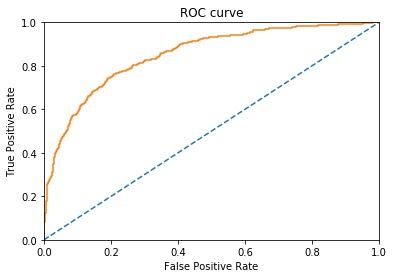

In [32]:
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### AUC - ROC Values

In [33]:
print('AUC - ROC value is', roc_auc_score(y_valid, probabilities_one_valid).round(3))

AUC - ROC value is 0.852


### Conclusion
* For the final testing, we used random forest classifier with n_estimators = 60, max_depth = 11. 
* AUC - ROC value for the validation set is 0.855.

## Overall Conclusion

* We detected missing values values of `Tenure` column with random numbers selecting from existing values (0 to 10) and we used One-Hot encoding for the categorical features.
* We splitted the data with 60% training data and 20% validation data.
* We used logistic regression model and random forest model. 
    * For the logistic regression, the Accuracy score is 0.791 and F1 score is 0.043, which doesn't match our expactation.
    * For the random forest classifier, the The best model is when estimators = 70, the accuracy score = 0.857 and F1 score = 0.567. We can improve our model. 
* In order to improve our model quality, we first used class weight adjustment by adding class weight = balanced in to our models. The F1 score for logistic regression is 0.48 and Accuracy score is 0.682; for random forest classifier is 0.611 and Validation Accuracy 0.845 when n_estimator = 60, Depth = 11. We can see F1 scores alrady improved. 
* Then we used **upsampling** and **downsampling** to do further improvment of our models. 
    * In upsampling, the F1 score for logistic regression is when repeats = 4, F1 score = 0.454; for random forest classifier is when repeats = 2, F1 score = 0.826. The logistic regression model didn't improved but random forest model has been improved a lot. 
    * In downsampling, the F1 score for logistic regression is when fraction = 0.27, F1 score = 0.45; for random forest classifier is when fraction = 0.37, F1 score = 0.612. Unfortunately, downsampling doesn't improve the F1 score for both models. 
* Then we did final testing using **random forest classifier**, because this model has F1 Score =  0.591 and accuracy score = 0.838. The AUC - ROC value for the validation set is 0.855. The random forest model really helped the business predict whether customers will churn or not.